En esta fase se desarrolla el análisis exploratorio del conjunto de datos final, con el objetivo de comprender su estructura, describir la distribución de las variables e identificar patrones relevantes. Se evalúan tendencias, posibles valores extremos y relaciones que existen entre variables, especialmente en torno a la variable objetivo `is_fraud`.

## Objetivo del análisis exploratorio de datos

El objetivo de este análisis exploratorio es examinar en profundidad el comportamiento y las características de las transacciones con tarjeta de crédito, mediante la integración de información económica a nivel de código postal, con el fin de comprender cómo se distribuye el fraude y qué factores se asocian con una mayor probabilidad de fraude. A través de esta revisión se pretende interpretar cada transacción no únicamente por sus atributos operativos, sino también considerando el entorno socioeconómico asociado al área en el que se produce, lo que permite ampliar el alcance del análisis y aportar una interpretación más completa.

El análisis busca identificar patrones y tendencias relevantes, así como posibles relaciones entre el fraude y variables clave del dataset, como el importe de la transacción, la categoría del comercio, la ubicación geográfica y los indicadores económicos agregados por ZIP. Los resultados obtenidos servirán como base para el análisis estadístico posterior, ayudando a priorizar variables de interés, establecer hipótesis de trabajo y definir indicadores y segmentaciones útiles para la elaboración del informe final.

## Importación de librerias

In [1]:
# Tratamiento de datos.

import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# Visualizaciones.

import matplotlib.pyplot as plt
import seaborn as sns

## Carga de datos `df_final.parquet`

In [2]:
df_final = pd.read_parquet("../data/2.processed/df_final.parquet")

Se inspecciona el encabezado del dataset para comprobar que la carga se ha realizado sin incidencias.

In [3]:
df_final.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,is_fraud,number_of_returns,adjusted_gross_income_agi,avg_agi,number_of_returns_with_total_income,total_income_amount,avg_total_income,number_of_returns_with_taxable_income,taxable_income_amount,avg_taxable_income
0,2019-06-22 12:28:00,fraud_Predovic Inc,Shopping_net,5.79,Male,Reno,Texas,89512,276896,Immunologist,1997-03-12,0,9810.0,291026.0,29.666259,9810.0,293304.0,29.898471,6420.0,149740.0,23.323988
1,2019-04-28 19:43:17,"fraud_Turner, Ziemann and Lehner",Food_dining,55.25,Male,Palermo,Ohio,58769,229,Administrator,1983-03-20,0,150.0,19468.0,129.786667,150.0,19782.0,131.880000,130.0,16059.0,123.530769
2,2019-11-26 13:06:50,"fraud_Schroeder, Wolff and Hermiston",Travel,525.26,Male,Richland,Pennsylvania,08350,825,Licensed Conveyancer,1991-07-06,0,380.0,18448.0,48.547368,380.0,18677.0,49.150000,310.0,11536.0,37.212903
3,2019-06-19 12:30:36,"fraud_Schroeder, Wolff and Hermiston",Travel,7.94,Female,Hawley,Michigan,56549,4508,Naval Architect,1949-04-24,0,2260.0,148251.0,65.597788,2260.0,151377.0,66.980973,1910.0,102419.0,53.622513
4,2019-05-19 18:01:52,fraud_Baumbach Ltd,Personal_care,9.55,Male,Comfrey,North Carolina,56019,914,Health And Safety Adviser,1944-07-26,0,440.0,22379.0,50.861364,440.0,23428.0,53.245455,360.0,14901.0,41.391667


Se consulta el final del dataset para asegurar que no existen cortes o anomalías en los registros finales.

In [4]:
df_final.tail()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,city_pop,job,dob,is_fraud,number_of_returns,adjusted_gross_income_agi,avg_agi,number_of_returns_with_total_income,total_income_amount,avg_total_income,number_of_returns_with_taxable_income,taxable_income_amount,avg_taxable_income
325085,2019-06-20 15:07:33,"fraud_Baumbach, Strosin and Nicolas",Shopping_pos,8.23,Female,Hedley,Wisconsin,79237,513,Early Years Teacher,1976-05-24,0,180.0,5351.0,29.727778,180.0,5451.0,30.283333,110.0,2905.0,26.409091
325086,2019-04-25 12:02:16,fraud_Erdman-Ebert,Personal_care,9.78,Female,Hopewell,California,23860,31970,Purchasing Manager,1935-08-15,0,12540.0,515284.0,41.091228,12540.0,519508.0,41.428070,9170.0,306179.0,33.389204
325087,2019-10-25 16:49:47,"fraud_O'Connell, Botsford and Hand",Home,26.62,Male,Grenada,Kentucky,96038,589,Systems Analyst,1945-12-21,0,280.0,11039.0,39.425000,280.0,11223.0,40.082143,200.0,5706.0,28.530000
325088,2019-01-15 20:24:39,"fraud_Witting, Beer and Ernser",Home,3.70,Female,Norwich,Minnesota,43767,1443,Research Scientist (Medical),1962-03-04,0,650.0,35001.0,53.847692,650.0,35515.0,54.638462,550.0,22850.0,41.545455
325089,2019-10-05 19:15:19,fraud_Kassulke Inc,Entertainment,14.30,Male,Greenwich,New York,08323,804,Insurance Risk Surveyor,1965-03-25,0,360.0,23882.0,66.338889,360.0,24325.0,67.569444,300.0,16373.0,54.576667


### Dimensión del dataset

Se verifica la forma del dataset para confirmar el volumen de información.

In [5]:
print(f"El número de filas es {df_final.shape[0]} y el número de columnas es {df_final.shape[1]} ")

El número de filas es 325090 y el número de columnas es 21 


In [6]:
df_final.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'city_pop', 'job', 'dob', 'is_fraud',
       'number_of_returns', 'adjusted_gross_income_agi', 'avg_agi',
       'number_of_returns_with_total_income', 'total_income_amount',
       'avg_total_income', 'number_of_returns_with_taxable_income',
       'taxable_income_amount', 'avg_taxable_income'],
      dtype='object')

## Creación de nuevas variables

Se generan nuevas variables a partir de las existentes para mejorar la calidad analítica del dataset, reducir la complejidad de ciertas relaciones y habilitar segmentaciones que aporten valor al análisis exploratorio y al dashboard.

### Variables temporales

In [38]:
df_final["trans_date"] = df_final["trans_date_trans_time"].dt.date

df_final["trans_date"] = pd.to_datetime(df_final['trans_date'])

df_final["year"] = df_final["trans_date_trans_time"].dt.year

df_final["month"] = df_final["trans_date_trans_time"].dt.month

df_final["day_of_week"] = df_final["trans_date_trans_time"].dt.day_name()

df_final["is_weekend"] = (df_final["day"]>'Friday').astype(int) 

df_final["hour"] = df_final["trans_date_trans_time"].dt.hour

In [22]:
def moment_of_day(h):

    if 0 <= h <= 4:
        return "night"
    
    elif 5 <= h <= 7:
        return "early morning"   
    
    elif 8 <= h <= 11:
        return "morning"
    
    elif 12 <= h <= 16:
        return "afternoon"
    
    elif 17 <= h <= 20:
        return "evening"
    
    else:
        return "late night"
    
df_final["moment_of_day"] = df_final["hour"].map(moment_of_day) 

Se crean variables temporales derivadas de `trans_date_trans_time` para analizar el comportamiento de las transacciones y detectar patrones asociados al fraude. En concreto, se extraen componentes como año, mes, día de la semana y hora, lo que permite estudiar tendencias, estacionalidad y variaciones recurrentes a lo largo del tiempo. Además, se define `is_weekend` para comparar de forma directa días laborables vs. fines de semana, simplificando el análisis y la interpretación en tablas y visualizaciones.

Finalmente, se agrupa la hora en franjas `moment_of_day` mediante intervalos más detallados. Con esto se busca reducir el ruido de trabajar con 24 categorías distintas y mejora la interpretabilidad, facilitando comparaciones y visualizaciones en el EDA y en el dashboard. En conjunto, estas transformaciones permiten analizar la tasa de fraude y el volumen de transacciones por periodos y franjas horarias, identificando estacionalidad, tendencias y posibles comportamientos anómalos en horarios menos habituales.

In [24]:
df_final["age"] = ((df_final["trans_date_trans_time"] - df_final["dob"]).dt.days / 365.25).astype(int)

In [25]:
print(df_final["age"].max())

print(df_final["age"].min())

95
13


In [26]:
ages = [0, 18, 25, 35, 45, 55, 65, 75, 85, 100]

ages_segments = ["<18", "18-25", "26-35", "36-45", "46-55", "56-65", "66-75", "76-85", "86+"]

df_final["age_group"] = pd.cut(df_final["age"], bins=ages, labels=ages_segments)

Se crea la variable `age` para disponer de una medida cuantitativa del perfil del cliente en el momento de la transacción, calculada a partir de la diferencia entre la fecha de la transacción y la fecha de nacimiento. Esta variable permite analizar si existen diferencias en el importe, la frecuencia y la tasa de fraude según la edad, y facilita la detección de patrones demográficos relevantes.

Posteriormente, se construye `age_group`, agrupando la edad en rangos predefinidos. Esto mejora la interpretabilidad y la comparación de resultados, ya que permite equiparar segmentos de edad, en vez de trabajar con edades individuales.

### Variables socioeconómicas

In [27]:
df_final["agi_per_return"] = (df_final["adjusted_gross_income_agi"] / df_final["number_of_returns"])

Se crea `agi_per_return`, como una medida normalizada de renta, divide el ingreso bruto ajustado total de un ZIP entre el número de declaraciones. Este indicador aproxima el nivel medio de renta por declarante en cada zona y permite comparar áreas evitando sesgos debidos a tamaños de población fiscal diferentes.

In [28]:
df_final["taxable_share"] = (df_final["taxable_income_amount"] / df_final["total_income_amount"])

Se calcula `taxable_share`, representa que parte del ingreso total es imponible. Esta variable aporta información sobre la estructura económica del ZIP y permite analizar si el patrón de fraude y consumo cambia en zonas donde una mayor proporción del ingreso está sujeta a tributación.

In [29]:
df_final["amt_vs_avg_agi"] = df_final["amt"] / df_final["avg_agi"]

Se genera `amt_vs_avg_agi`, para contextualizar el importe de cada transacción respecto al nivel de renta medio del ZIP. De este modo, una misma cantidad puede interpretarse en términos relativos, facilitando la comparación entre zonas con diferentes niveles de ingresos y ayudando a identificar transacciones inusualmente altas para su contexto socioeconómico.

In [30]:
income_segment = ["low", "lower-middle", "upper-middle", "high"]

df_final["income_level"] = pd.qcut(df_final["avg_agi"], q = 4, labels = income_segment)

Se crea `income_bracket` dividiendo `avg_agi` en cuatro grupos. Esta segmentación transforma una variable continua en categorías, mejorando la lectura de resultados y permitiendo comparar métricas como la tasa de fraude y el importe medio entre distintos niveles de renta.

### Variables del conjunto de datos

Se revisa el conjunto de campos disponibles para preparar el análisis.

In [32]:
print(f"Tras la creación de las nuevas variables, el número de filas es {df_final.shape[0]} y el número de columnas es {df_final.shape[1]} ")

Tras la creación de las nuevas variables, el número de filas es 325090 y el número de columnas es 34 


In [37]:
df_final.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'gender',
       'city', 'state', 'zip', 'city_pop', 'job', 'dob', 'is_fraud',
       'number_of_returns', 'adjusted_gross_income_agi', 'avg_agi',
       'number_of_returns_with_total_income', 'total_income_amount',
       'avg_total_income', 'number_of_returns_with_taxable_income',
       'taxable_income_amount', 'avg_taxable_income', 'year', 'month', 'day',
       'is_weekend', 'hour', 'moment_of_day', 'age', 'age_group',
       'agi_per_return', 'taxable_share', 'amt_vs_avg_agi', 'income_level',
       'trans_date'],
      dtype='object')

In [36]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325090 entries, 0 to 325089
Data columns (total 34 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   trans_date_trans_time                  325090 non-null  datetime64[ns]
 1   merchant                               325090 non-null  category      
 2   category                               325090 non-null  category      
 3   amt                                    325090 non-null  float64       
 4   gender                                 325090 non-null  category      
 5   city                                   325090 non-null  category      
 6   state                                  325090 non-null  category      
 7   zip                                    325090 non-null  object        
 8   city_pop                               325090 non-null  int64         
 9   job                                    325090 no

### Separación de variables numéricas y categóricas

Se clasifican las variables en función de su naturaleza para estructurar el análisis exploratorio de manera más eficiente.

In [19]:
cols_num_final  = df_final.select_dtypes(include='number').columns

cols_cate_final = df_final.select_dtypes(include=['object', 'category']).columns

print(f"Las variables numéricas son: {cols_num_final}\n")
print(f"Las variables categóricas son: {cols_cate_final}")

Las variables numéricas son: Index(['amt', 'city_pop', 'is_fraud', 'number_of_returns',
       'adjusted_gross_income_agi', 'avg_agi',
       'number_of_returns_with_total_income', 'total_income_amount',
       'avg_total_income', 'number_of_returns_with_taxable_income',
       'taxable_income_amount', 'avg_taxable_income', 'year', 'month',
       'is_weekend', 'hour', 'age', 'agi_per_return', 'taxable_share',
       'amt_vs_avg_agi'],
      dtype='object')

Las variables categóricas son: Index(['merchant', 'category', 'gender', 'city', 'state', 'zip', 'job', 'day',
       'moment_of_day', 'age_group', 'income_level'],
      dtype='object')


### Análisis univariante de variables numéricas

Resumen estadistico

In [9]:
df_final.describe(include= 'number').round(2).T

,count,mean,std,min,25%,50%,75%,max
amt,325090.0,70.34,156.07,1.00,9.60,47.10,82.89,25086.94
city_pop,325090.0,103571.97,325212.23,140.00,1324.00,4056.00,33804.00,2906700.00
is_fraud,325090.0,0.01,0.08,0.00,0.00,0.00,0.00,1.00
number_of_returns,325090.0,5049.18,6883.12,100.00,560.00,1680.00,7660.00,44600.00
adjusted_gross_income_agi,325090.0,315718.96,494387.17,3129.00,24809.00,82095.00,399877.00,3626560.00
avg_agi,325090.0,56.05,29.83,19.58,41.35,48.57,60.76,418.18
number_of_returns_with_total_income,325090.0,5049.18,6883.12,100.00,560.00,1680.00,7660.00,44600.00
total_income_amount,325090.0,320352.70,502132.18,3157.00,25286.00,82915.00,404038.00,3669734.00
avg_total_income,325090.0,56.99,30.41,19.76,42.15,49.59,61.78,424.36
number_of_returns_with_taxable_income,325090.0,3884.98,5349.01,60.00,420.00,1270.00,5950.00,33050.00


**Observaciones:**

`amt`: La variable presenta una media de 70,34 y una desviación estándar de 156,07, lo que indica una dispersión elevada en los importes. Aunque la mayor parte de las transacciones se sitúa en rangos relativamente bajos (Q1) 9,60 y (Q3) 82,89, el máximo alcanza 25.086,94, muy por encima del comportamiento general. Esta diferencia refleja una distribución fuertemente asimétrica hacia la derecha y sugiere la existencia de operaciones de importe excepcional que conviene considerar como valores extremos en el análisis.

`city_pop`: Muestra una media de 103.571,97 y una desviación estándar muy alta de 325.212,23, lo que confirma una gran heterogeneidad en el tamaño de las localidades asociadas a las transacciones. Los cuartiles (Q1) 1.324, (Q3) 33.804 indican que una parte relevante de los registros procede de áreas poco pobladas, mientras que el máximo 2.906.700 evidencia la presencia de grandes núcleos urbanos. En conjunto, la variable presenta una cola hacia la derecha y una variabilidad muy significativa entre ZIPs.

`is_fraud`: Al tratarse de una variable binaria, su media representa la proporción de fraude en el conjunto. El valor medio es cercano a 0,01, lo que confirma que el fraude es un evento minoritario y que existe un desbalanceo importante entre clases. Este comportamiento implica que, conviene interpretar resultados en términos de tasa y no solo de volumen.

`number_of_returns`: Presenta una media de 5.049,18 con desviación estándar de 6.883,12, reflejando una dispersión considerable en el número de declaraciones por ZIP. El rango va de 100 a 44.600 y el tramo central va desde (Q1) 560, hasta (Q3) 7.660 queda muy por debajo del máximo, lo que sugiere una asimetría positiva. Esto indica que, aunque la mayoría de códigos postales registra volúmenes moderados, existe un subconjunto reducido con un número de declaraciones significativamente superior.

`adjusted_gross_income_agi`: Presenta una media que se sitúa en 315.718,96 y la desviación estándar en 494.387,17, lo que evidencia alta variabilidad en el volumen de AGI agregado por ZIP. Los valores oscilan entre 3.129 y 3.626.560, y la distancia entre el tercer cuartil (Q3) 399.877 y el máximo refuerza la presencia de una cola hacia la derecha. En términos prácticos, esto sugiere que unos pocos ZIPs concentran niveles de ingreso bruto ajustado especialmente elevados frente al resto.

`avg_agi`: Registra una media de 56,05 y una desviación estándar de 29,83, con valores típicos concentrados en torno a Q1 (41,35) y Q3 (60,76). Sin embargo, el máximo llega a 418,18, muy alejado del rango habitual, lo que sugiere outliers en promedios para determinados ZIPs.

`number_of_returns_with_total_income`: Presenta los mismos estadísticos que number_of_returns, lo que indica que ambas variables están prácticamente alineadas en este conjunto. Este comportamiento sugiere que, para la mayoría de ZIPs, el volumen de declaraciones coincide con el volumen de declaraciones con ingresos totales reportados, por lo que puede existir redundancia entre ambas medidas desde el punto de vista analítico.

`total_income_amount`: Muestra una media de 320.352,70 y desviación estándar de 502.132,18, con un rango entre 3.157 y 3.669.734, con una marcada asimetría positiva y valores máximos muy superiores al tramo central (Q3) 404.038. Esto sugiere una concentración de importes elevados en un grupo reducido de ZIPs.

`avg_total_income`: Presenta una media de 56,99 y una desviación estandar de 30,41 con un rango que va desde 19,76 hasta 424,36. La mayor parte de los valores se concentra en niveles moderados (Q1) 42,15, (Q3) 61,78, mientras que los máximos reflejan casos puntuales con promedios muy elevados. Este comportamiento refuerza la idea de que, existen ZIPs con promedios inusualmente altos que pueden influir en la media global.

`number_of_returns_with_taxable_income`: Presenta una media de 3.884,98 y la desviación estándar 5.349,01, con un rango de 60 a 33.050. En comparación con number_of_returns, los valores son inferiores, lo que indica que no todas las declaraciones reportan ingreso imponible. Además, la presencia de máximos elevados frente al tramo central (Q1) 420, (Q3) 5.950 muestra una asimetría positiva y una notable variación entre ZIPs en el volumen de declaraciones sujetas a tributación.

`taxable_income_amount`: Registra una media de 216.562,45 con desviación estándar de 365.145,41, y un rango entre 1.298 y 2.859.894. La diferencia entre el máximo y el tramo central (Q3) 249.088 evidencia una cola hacia la derecha, lo que sugiere que unos pocos ZIPs concentran importes imponibles muy elevados. Este patrón es consistente con una distribución desigual de la base imponible entre zonas.

`avg_taxable_income`: Muestra una media de 47,74 y una desviación estándar de 29,01, con valores típicos entre (Q1) 33,76 y (Q3) 51,50. Su nivel central es inferior al de **avg_agi** y **avg_total_income**, lo que resulta coherente dado que el ingreso imponible suele ser una parte del ingreso total. No obstante, el máximo de 390,89 se aleja notablemente del comportamiento general, indicando la presencia de ZIPs con promedios imponibles inusualmente altos que pueden considerarse casos atípicos para análisis comparativos.

In [10]:
df_final[cols_num_final].median().round(2)

amt                                         47.10
city_pop                                  4056.00
is_fraud                                     0.00
number_of_returns                         1680.00
adjusted_gross_income_agi                82095.00
avg_agi                                     48.57
number_of_returns_with_total_income       1680.00
total_income_amount                      82915.00
avg_total_income                            49.59
number_of_returns_with_taxable_income     1270.00
taxable_income_amount                    51446.00
avg_taxable_income                          40.44
dtype: float64

**Observaciones:**

`amt`: La mediana del importe es 47,10, lo que indica que el valor típico de una transacción se sitúa en torno a ese nivel. Al compararlo con la media 70.34, se aprecia que existen operaciones de importe elevado que incrementan el promedio, por lo que la mediana representa mejor el comportamiento central del gasto.

`city_pop`: La mediana de la población es 4.056, lo que sugiere que una parte importante de las transacciones se asocia a localidades relativamente pequeñas. Dado que la media es muy superior 103571.97, se deduce que hay un conjunto menor de ZIPs pertenecientes a grandes ciudades que desplazan el promedio hacia arriba, reflejando una distribución heterogénea por tamaño de localidad.

`is_fraud`: La mediana es 0, coherente con el carácter minoritario del fraude. Esto confirma que, en el punto central de la distribución, lo habitual es que la transacción no sea fraudulenta, y refuerza el desbalanceo de la variable objetivo.

`number_of_returns`: La mediana es de 1.680 declaraciones por ZIP, lo que describe un nivel moderado de actividad fiscal en la mayoría de áreas. La diferencia respecto a la media sugiere la existencia de ZIPs con volúmenes de declaraciones más altos que elevan el promedio, por lo que en este caso la mediana ofrece una referencia más representativa del conjunto.

`adjusted_gross_income_agi`: La mediana es 82.095, indicando que el volumen central de ingreso bruto ajustado agregado por ZIP se sitúa alrededor de ese valor. La media es 315.718,96 considerablemente superior, lo que apunta a una distribución sesgada, donde algunas zonas concentran importes de AGI muy elevados que incrementan el promedio.

`avg_agi`: La mediana es 48,57, lo que sugiere que el promedio del AGI por declaración se sitúa en torno a ese nivel. La diferencia con la media 56.05 evidencia que ciertos ZIPs presentan promedios especialmente altos que elevan el valor medio, mientras que la mediana resume mejor el patrón habitual.

`number_of_returns_with_total_income`: La mediana es 1.680, idéntica a number_of_returns, lo que indica que, el volumen de declaraciones coincide con el volumen de declaraciones con ingresos totales reportados. Esto refuerza la fuerte relación entre ambas variables en el dataset.

`total_income_amount`: La mediana es 82.915, la diferencia con la media 320.352,70 sugiere también una distribución sesgada por la presencia de ZIPs con importes excepcionalmente altos.

`avg_total_income`: La mediana es 49,59, lo que indica que el ingreso total promedio por declaración se sitúa típicamente alrededor de ese valor. La media 56.99 es superior, lo que sugiere que existen áreas con promedios de ingreso total más elevados que incrementan el promedio global.

`number_of_returns_with_taxable_income`: La mediana es 1.270, inferior a la mediana de declaraciones totales 1.680, lo que sugiere que, no todas las declaraciones incluyen ingreso imponible, como se ha mencionado anteriormente. Esto indica que una proporción relevante de retornos queda fuera del ingreso sujeto a tributación.

`taxable_income_amount`: La mediana es 51.446, por debajo de los importes centrales de AGI e ingreso total, lo que refleja que el ingreso imponible tiende a situarse en niveles inferiores respecto a las magnitudes agregadas previas. La diferencia con la media 216.562,45 confirma que existen ZIPs con importes imponibles elevados que empujan el promedio hacia arriba, como se ha observado en variables anteriores.

`avg_taxable_income`: La mediana es 40,44, inferior a **avg_agi** y **avg_total_income**, lo cual tiene sentido, ya que el ingreso imponible suele ser una parte del ingreso total, y por esta razón es menor. La media 47.74 es más alta, lo que sugiere que ciertos ZIPs presentan promedios imponibles elevados que incrementan el valor medio como ha quedado demostrado en el resto de varibales, mientras que la mediana describe mejor el nivel central.



### Histogrmas

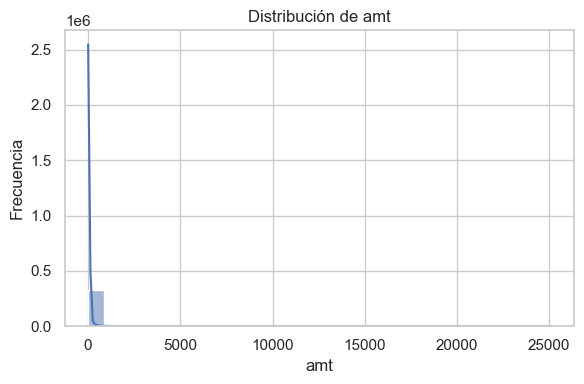

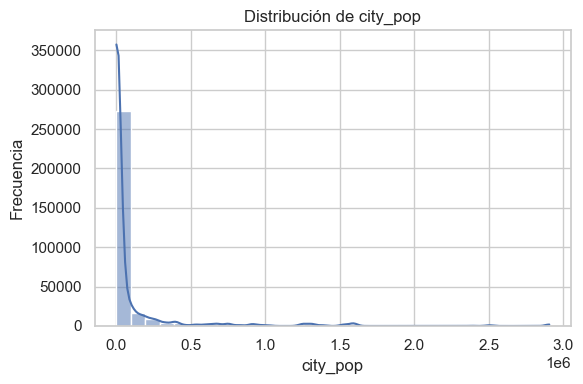

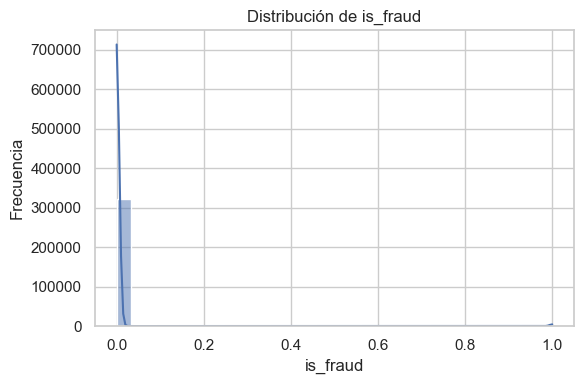

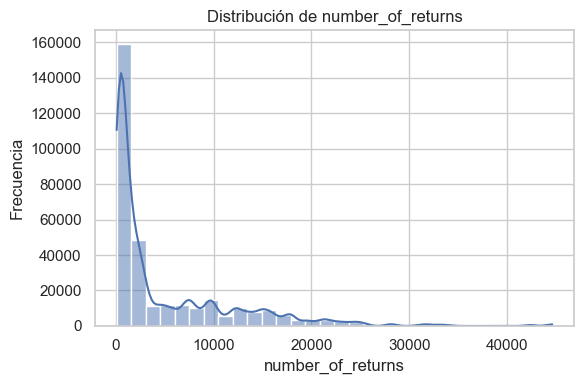

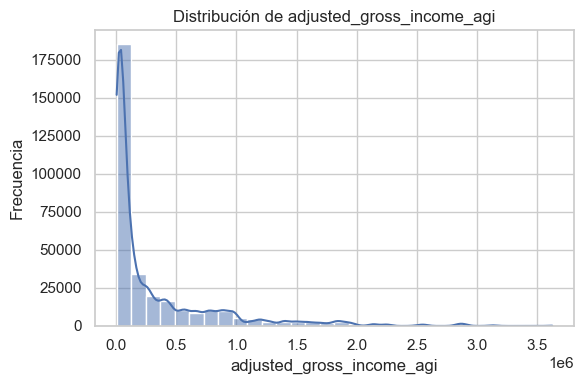

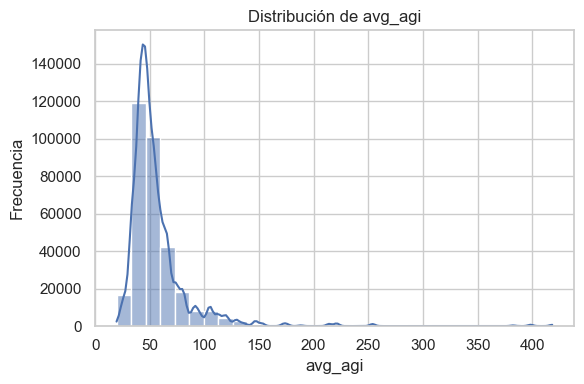

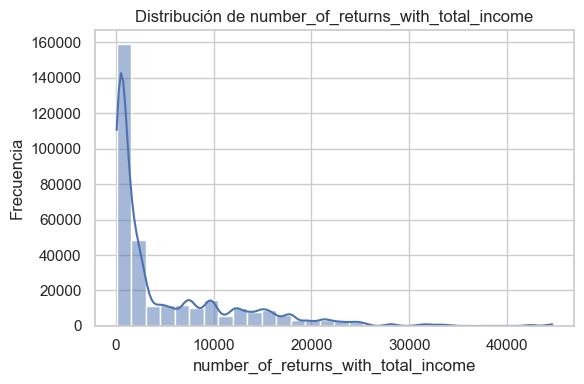

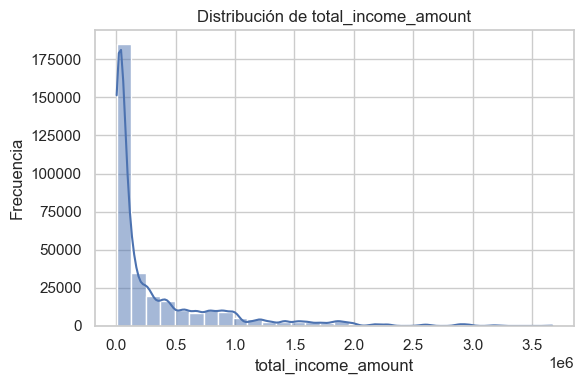

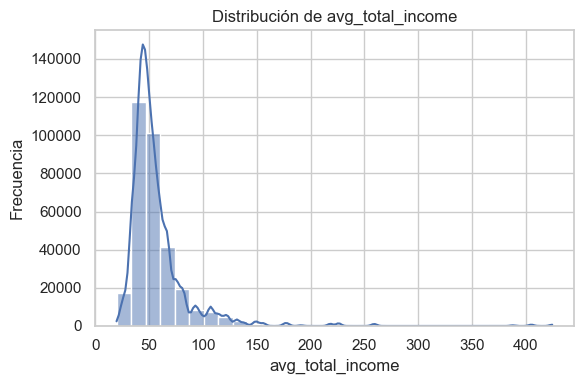

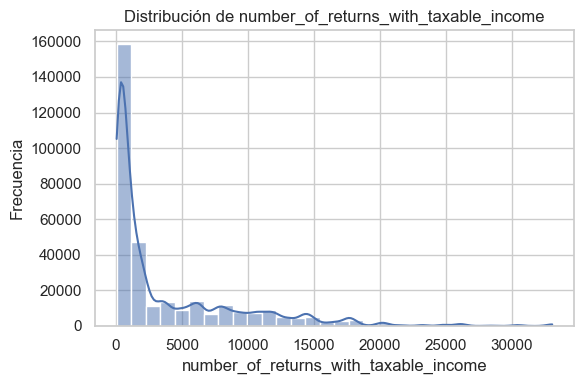

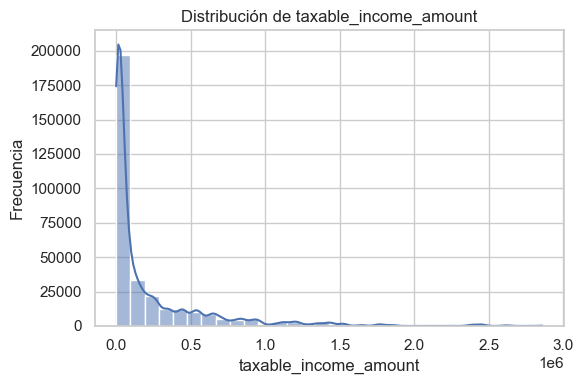

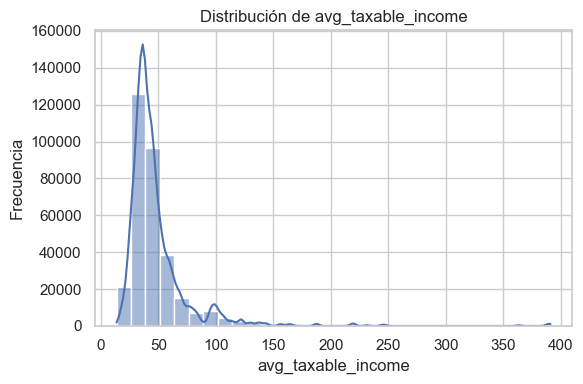

In [11]:
sns.set(style="whitegrid", context="notebook")

for col in cols_num_final:

    plt.figure(figsize=(6, 4)) 

    sns.histplot(df_final[col], bins=30, stat="count", kde=True )

    plt.title(f'Distribución de {col}')

    plt.xlabel(col)

    plt.ylabel('Frecuencia')

    plt.tight_layout()

    plt.show()

**Observaciones:**

`amt`: La distribución muestra una concentración muy elevada en importes bajos y un descenso rápido conforme aumenta el valor de la transacción. Se aprecia una cola larga hacia la derecha con operaciones de importe muy alto poco frecuentes, lo que confirma una asimetría positiva marcada y la presencia de valores extremos que pueden comprimir la visualización en escala lineal.

`city_pop`: El histograma evidencia una fuerte concentración en poblaciones bajas y una cola derecha muy pronunciada que se extiende hasta valores próximos a 3 millones. Esto indica que el conjunto incluye mayoritariamente ZIPs asociados a localidades pequeñas o medianas, pero también incorpora grandes áreas urbanas poco frecuentes. La asimetría y la amplitud del rango sugieren una variable altamente heterogénea, donde los valores extremos pueden dominar la representación en escala lineal.

`is_fraud`: El histograma refleja una distribución altamente desbalanceada, con una acumulación casi total en el valor 0 (no fraude) y una presencia muy reducida en 1 (fraude). Esto indica que el fraude es un evento minoritario y que, para interpretaciones comparativas, es más informativo trabajar con tasas que con recuentos absolutos.

`number_of_returns`: Se observa una gran concentración en valores bajos y una cola hacia la derecha prolongada hacia valores altos. Este patrón sugiere una distribución muy asimétrica, donde la mayoría de códigos postales presenta volúmenes moderados y un grupo reducido concentra niveles de declaraciones significativamente superiores.

`adjusted_gross_income_agi`: El histograma evidencia valores mayoritariamente concentrados en niveles bajos y medios, y una cola derecha extensa. La existencia de ZIPs con importes agregados muy elevados genera una asimetría positiva notable, consistente con una concentración de ingresos en un subconjunto reducido de áreas.

`avg_agi`: La distribución se concentra principalmente en un rango central en torno a valores medios, con una caída progresiva hacia la derecha. También muestra una cola hacia la derecha con casos aislados de promedios muy altos, lo que apunta a observaciones atípicas en ciertos códigos postales.

`number_of_returns_with_total_income`: Presenta una forma prácticamente idéntica a **number_of_returns**, con concentración en valores bajos y cola hacia la derecha. Esta similitud sugiere que ambas variables están fuertemente relaciondas en el dataset, como se ha mencionado anteriormente y que su distribución aporta información muy redundante en términos de forma y rango.

`total_income_amount`: Presenta una alta concentración de valores relativamente bajos y una cola pronunciada hacia la derecha, hacia importes muy elevados. Esto indica que el ingreso total agregado está distribuido de forma desigual entre ZIPs, con pocos casos que arrastran la escala hacia máximos altos.

`avg_total_income`: El histograma muestra una concentración clara de observaciones en torno a valores aproximados entre 40 y 70, donde se sitúa la mayor parte del conjunto. A partir de ese tramo, la frecuencia disminuye de forma progresiva y aparece una cola hacia la derecha con un número reducido de ZIPs que presentan promedios de ingreso total significativamente más altos.

`number_of_returns_with_taxable_income`: Se muestra una concentración muy marcada en valores bajos, también presenta un descenso rápido conforme aumentan las declaraciones con ingreso imponible y una cola hacia la derecha extensa que se prolonga hasta cifras superiores a 30.000. Esto indica que, para la mayoría de ZIPs, el número de declaraciones con ingreso imponible es relativamente reducido, mientras que un grupo minoritario registra volúmenes muy altos que amplían el rango y generan una asimetría positiva clara.

`taxable_income_amount`: El histograma muestra una concentración muy alta en valores bajos, seguida de una rápida caída y una cola hacia la derecha extensa que se prolonga hasta importes cercanos a 3 millones. Este patrón confirma una asimetría positiva muy marcada, donde la mayoría de ZIPs registra niveles moderados de ingreso imponible agregado, mientras que un número reducido concentra importes excepcionalmente elevados que amplían el rango y condicionan la escala del gráfico.

`avg_taxable_income`: La distribución se concentra principalmente en torno a valores medios aproxdimadamente entre 30 y 60, con una disminución progresiva hacia la derecha. Además se observa igualmente una cola derecha con casos aislados que alcanzan valores elevados de hasta 400. Esto sugiere la presencia de ZIPs con promedios imponibles atípicos, que pueden influir en la media y justificar el uso de escalas alternativas en visualización.

### Boxplot

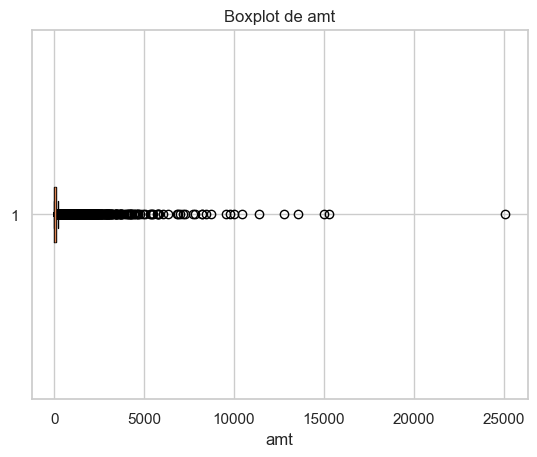

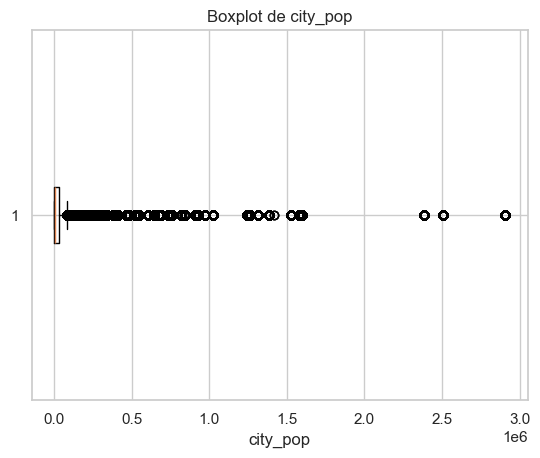

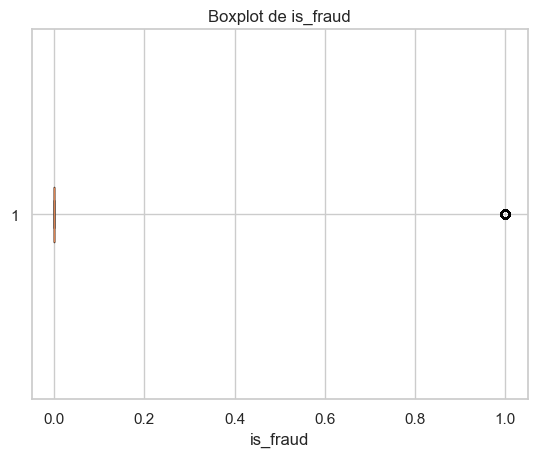

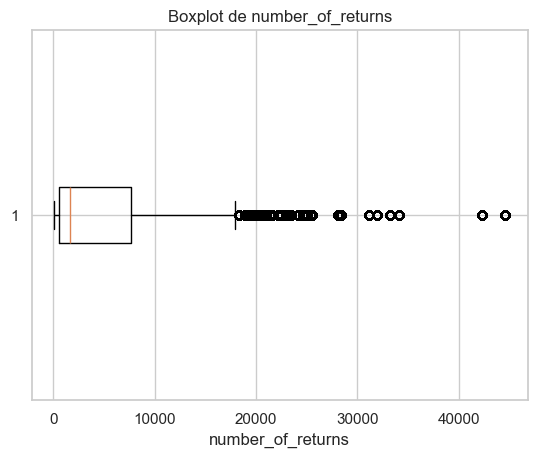

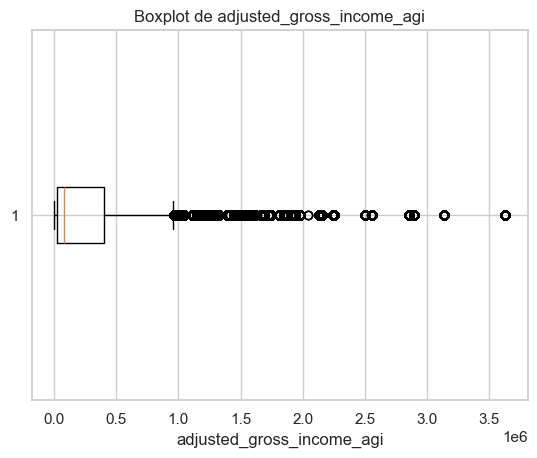

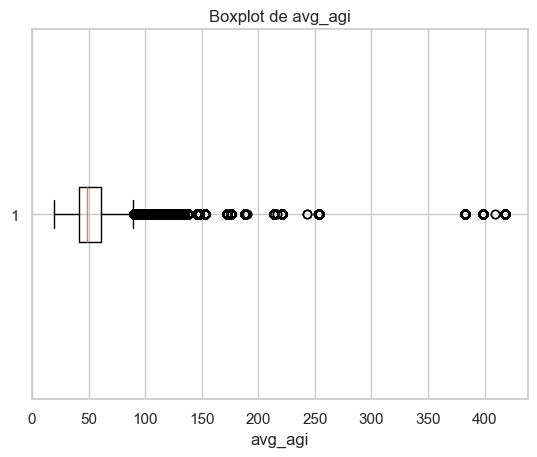

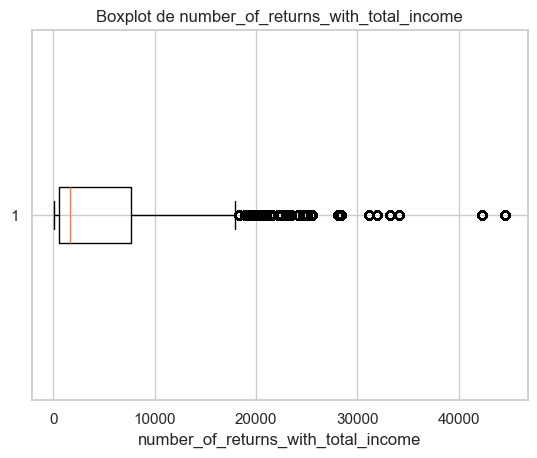

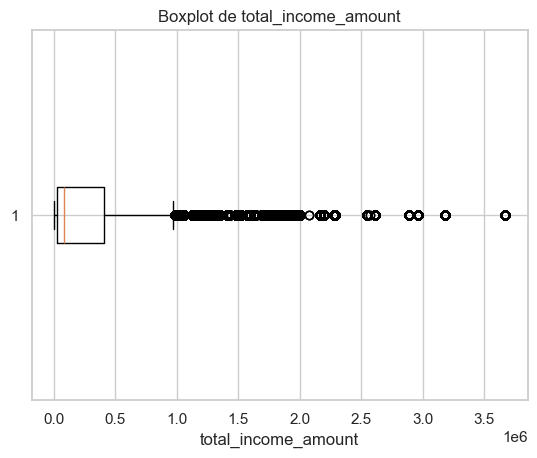

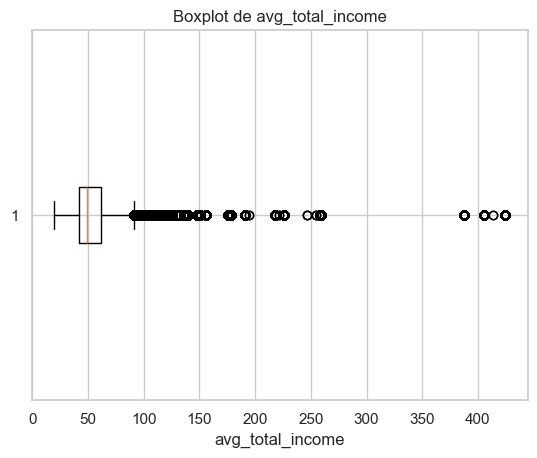

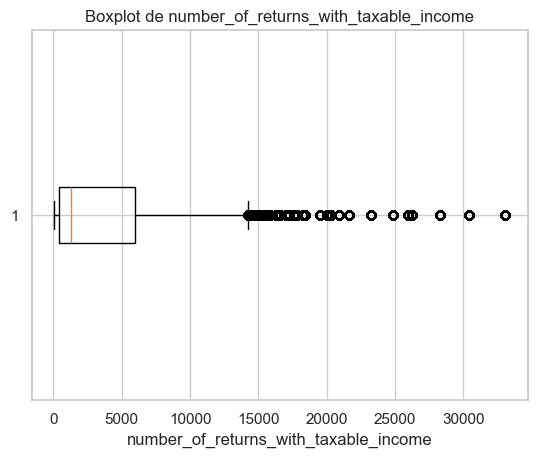

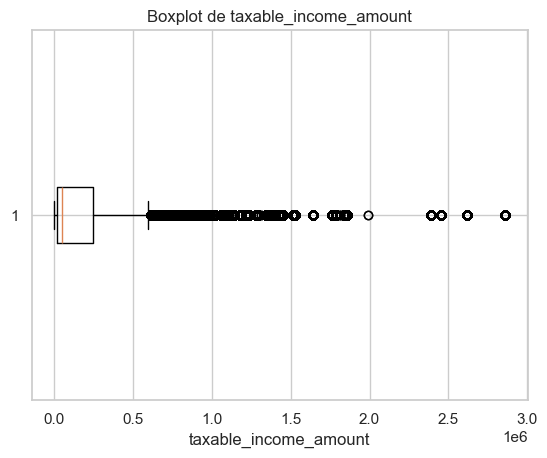

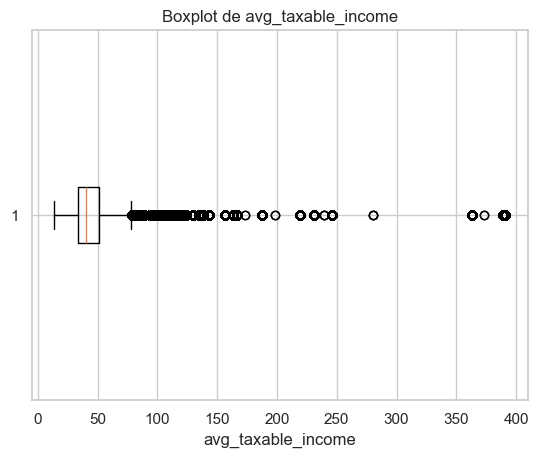

In [12]:
for col in cols_num_final:

    plt.boxplot(df_final[col], vert=False)

    plt.title(f'Boxplot de {col}')

    plt.xlabel(col)
    
    plt.show()

**Observaciones**

`amt`: El boxplot confirma una asimetría positiva muy marcada. La caja se concentra en importes bajos y aparecen numerosos valores atípicos hacia la derecha, con transacciones de cuantía muy superior al rango central. Estos outliers son coherentes con compras puntuales de alto importe y explican la elevada dispersión observada en el histograma.

`city_pop`: Se aprecia un núcleo central muy próximo a valores bajos, mientras que existen múltiples outliers hacia poblaciones altas, incluyendo casos extremos cercanos a grandes áreas urbanas. Este patrón indica una fuerte heterogeneidad territorial, donde la mayoría de ZIPs se asocia a localidades pequeñas y medianas, una minoría se asocia a ciudades muy pobladas.

`is_fraud`: Al ser una variable binaria, la caja queda prácticamente aplastada en 0, y los valores 1 aparecen como puntos aislados. Esto refleja visualmente el desbalanceo, la gran mayoría de transacciones no son fraudulentas y los fraudes son poco frecuentes.

`number_of_returns`: El boxplot muestra que la mayor parte de los ZIPs se concentra en un tramo relativamente bajo de declaraciones, sin embargo, aparecen muchos puntos aislados en el extremo superior, lo que indica la existencia de códigos postales con volúmenes de declaraciones excepcionalmente altos. Este patrón confirma una distribución desigual, donde pocos ZIPs concentran gran parte de la actividad.

`adjusted_gross_income_agi`: La mayor parte de los valores se concentra en el tramo bajo-medio por debajo de 0,5, también se observan múltiples outliers hacia importes agregados muy elevados, superiores a 3,5. El patrón es consistente con una distribución fuertemente sesgada, donde algunos ZIPs concentran niveles de AGI excepcionalmente altos respecto al resto.

`avg_agi`: La caja se sitúa en un rango relativamente compacto en torno a 50, pero aparecen outliers pronunciados hacia la derecha, por encima de 400, con ZIPs que muestran promedios notablemente superiores.

`number_of_returns_with_total_income`: El boxplot refleja que la mayoría de ZIPs se agrupa en un tramo bajo y aparece una dispersión limitada en el rango central. También, se observan numerosos puntos aislados en la parte alta, lo que indica que existen áreas con un volumen extraordinariamente elevado de declaraciones con ingresos reportados. En conjunto, el patrón sugiere una distribución sesgada a la derecha, dominada por pocos ZIPs con valores extremos.

`total_income_amount`: Se observa que la mayor parte de los ZIPs concentra importes agregados en un rango relativamente bajo, por debajo de 0,5. No obstante, aparecen numerosos valores atípicos hacia la derecha, incluyendo algunos extremadamente altos, superando los 3,5 lo que evidencia que una minoría de códigos postales acumula volúmenes de ingreso total muy superiores al patrón general. Este comportamiento confirma una asimetría positiva y una fuerte concentración de valores en el tramo bajo frente a pocos casos de gran magnitud.

`avg_total_income`: El rango central se mantiene relativamente estable en torno a 50, pero la presencia de outliers altos es clara, con algunos ZIPs muy por encima del comportamiento típico. La distribución sugiere que el promedio de ingreso total suele situarse en valores moderados, pero existen casos puntuales que se apartan notablemente.

`number_of_returns_with_taxable_income`: La caja aparece desplazada hacia valores más bajos, y se observan outliers en la parte alta. Esto indica que, para la mayoría de ZIPs, el número de declaraciones con ingreso imponible es menor, aunque existen áreas con volúmenes imponibles excepcionalmente elevados que se comportan como valores atípicos.

`taxable_income_amount`: El boxplot muestra una caja concentrada en valores relativamente bajos, lo que indica que la mayor parte de los ZIPs presenta importes imponibles agregados moderados, por debajo de 0,5. Sin embargo, aparecen numerosos puntos atípicos hacia la derecha, incluyendo algunos de magnitud muy elevada, lo que evidencia que un grupo reducido de códigos postales concentra volúmenes de ingreso imponible significativamente superiores. El patrón confirma una asimetría positiva marcada y una presencia relevante de valores extremos.

`avg_taxable_income`: El boxplot indica que la mayoría de los valores se concentra en un intervalo relativamente acotado, por debajo de 50 lo que sugiere un comportamiento central bastante estable. No obstante, aparecen numerosos valores atípicos en el extremo superior, con algunos casos claramente alejados del rango habitual. Esto apunta a la existencia de ZIPs específicos con promedios de ingreso imponible excepcionalmente altos, capaces de ampliar la variabilidad de la variable.

## Análisis univariante de variables categóricas



### Frecuencias y proporciones

In [13]:
for col in cols_cate_final:

    print(f'\nColumna: {col}')

    display(df_final[col].value_counts().head(10))
    
    display((df_final[col].value_counts(normalize=True).head(10) * 100).round(2))


Columna: merchant


merchant
fraud_Kilback LLC                     1161
fraud_Boyer PLC                        906
fraud_Dickinson Ltd                    888
fraud_Cormier LLC                      883
fraud_Schumm PLC                       881
fraud_Kuhn LLC                         856
fraud_Jenkins, Hauck and Friesen       701
fraud_Schiller, Blanda and Johnson     686
fraud_Bartoletti-Wunsch                681
fraud_Rodriguez Group                  671
Name: count, dtype: int64

merchant
fraud_Kilback LLC                     0.36
fraud_Boyer PLC                       0.28
fraud_Dickinson Ltd                   0.27
fraud_Cormier LLC                     0.27
fraud_Schumm PLC                      0.27
fraud_Kuhn LLC                        0.26
fraud_Jenkins, Hauck and Friesen      0.22
fraud_Schiller, Blanda and Johnson    0.21
fraud_Bartoletti-Wunsch               0.21
fraud_Rodriguez Group                 0.21
Name: proportion, dtype: float64


Columna: category


category
Gas_transport     31941
Grocery_pos       30995
Home              30984
Shopping_pos      29556
Kids_pets         28177
Shopping_net      24252
Entertainment     23619
Food_dining       23224
Personal_care     22748
Health_fitness    21555
Name: count, dtype: int64

category
Gas_transport     9.83
Grocery_pos       9.53
Home              9.53
Shopping_pos      9.09
Kids_pets         8.67
Shopping_net      7.46
Entertainment     7.27
Food_dining       7.14
Personal_care     7.00
Health_fitness    6.63
Name: proportion, dtype: float64


Columna: gender


gender
Female    175934
Male      149156
Name: count, dtype: int64

gender
Female    54.12
Male      45.88
Name: proportion, dtype: float64


Columna: city


city
Phoenix         1593
San Antonio     1556
Meridian        1531
Warren          1370
Thomas          1360
Cleveland       1355
Naples          1277
Indianapolis    1262
Burbank         1245
Brandon         1244
Name: count, dtype: int64

city
Phoenix         0.49
San Antonio     0.48
Meridian        0.47
Warren          0.42
Thomas          0.42
Cleveland       0.42
Naples          0.39
Indianapolis    0.39
Burbank         0.38
Brandon         0.38
Name: proportion, dtype: float64


Columna: state


state
Texas           25556
Pennsylvania    20538
New York        16197
Illinois        14716
Florida         14087
California      13196
Ohio            11836
Alabama          9224
Virginia         8783
Kentucky         8740
Name: count, dtype: int64

state
Texas           7.86
Pennsylvania    6.32
New York        4.98
Illinois        4.53
Florida         4.33
California      4.06
Ohio            3.64
Alabama         2.84
Virginia        2.70
Kentucky        2.69
Name: proportion, dtype: float64


Columna: zip


zip
34112    1129
73754    1109
48088    1073
82514    1034
39073     979
05461     970
72042     959
72476     956
38761     956
07060     953
Name: count, dtype: int64

zip
34112    0.35
73754    0.34
48088    0.33
82514    0.32
39073    0.30
05461    0.30
72042    0.29
72476    0.29
38761    0.29
07060    0.29
Name: proportion, dtype: float64


Columna: job


job
Designer, Ceramics/Pottery             2496
Financial Adviser                      2302
It Trainer                             2297
Environmental Consultant               2222
Chartered Public Finance Accountant    2166
Exhibition Designer                    2123
Copywriter, Advertising                2119
Materials Engineer                     1989
Agricultural Consultant                1987
Comptroller                            1974
Name: count, dtype: int64

job
Designer, Ceramics/Pottery             0.77
Financial Adviser                      0.71
It Trainer                             0.71
Environmental Consultant               0.68
Chartered Public Finance Accountant    0.67
Exhibition Designer                    0.65
Copywriter, Advertising                0.65
Materials Engineer                     0.61
Agricultural Consultant                0.61
Comptroller                            0.61
Name: proportion, dtype: float64

**Observaciones:**

`merchant`: La distribución está muy fragmentada. El comercio con mayor frecuencia, fraud_Kilback LLC apenas representa 0,36% de los 1.161 regsitros que hay en total, y el resto de los “top 10” se sitúa en proporciones similares entre el 0,21% y el 0,28%. Esto indica una alta diversidad de comercios y ausencia de un dominante claro, por lo que para análisis y visualizaciones puede ser necesario agrupar por categoría.

`category`: Se observa una concentración moderada en pocas categorías. **Gas_transport** lidera con el 9,83%, seguida de **Grocery_pos** y **Home** con 9,53% cada una. En conjunto, las categorías principales acumulan una parte significativa del dataset, lo que facilita comparativas por tipo de gasto sin una fragmentación excesiva.

`gender`: La variable presenta un reparto relativamente equilibrado, con predominio de **Female** con un 54,12% frente a **Male** que presenta un 45,88%. Aunque existe una categoría mayoritaria, la diferencia no es extrema y permite segmentaciones por género con volumen suficiente en ambos grupos.

`city`: La frecuencia por ciudad está muy dispersa. La ciudad más común es **Phoenix** que representa solo el 0,49% de los 1.593 registros presentes y el resto del top 10 se mantiene por debajo de ese valor. Esto sugiere alta cardinalidad y una distribución muy repartida entre ciudades, por lo que conviene analizarla agregando por estado, regiones o agrupaciones.

`state`: Existe una concentración moderada por estado. **Texas** es el más representado con 7,86%, seguido por **Pennsylvania** con un 6,32% y **New York** 4,98%. Aun así, la distribución está relativamente repartida entre varios estados, lo que permite comparaciones geográficas con suficiente variabilidad.

`zip`: Los códigos postales muestran una distribución muy repartida. El ZIP más frecuente es el **34112** que supone el 0,35%, el resto del top 10 ronda valores similares entre 0,29% y 0,34%. Esto confirma que zip actúa como identificador geográfico de alta definición, con repetición limitada por código, su análisis puede ser más informativo si se agrupa por ciudad o estado o por indicadores socioeconómicos.

`job`: La variable presenta gran variedad de ocupaciones y baja concentración en las categorías más frecuentes. La ocupación líder **Designer, Ceramics/Pottery** representa el 0,77%, y el resto del top 10 se mantiene alrededor del 0,61% y 0,71%. Esto evidencia una alta cardinalidad y fragmentación, por lo que, si se utiliza en visualizaciones o segmentaciones, puede ser útil consolidar las ocupaciones por sector.

### Gráficos de barras

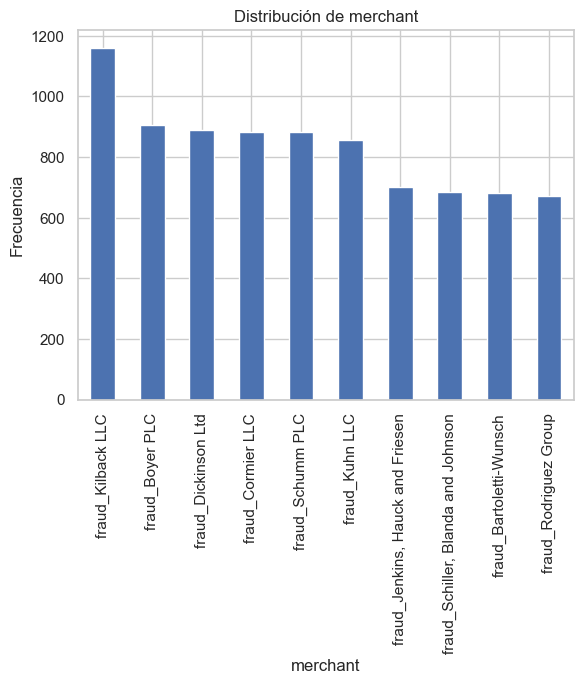

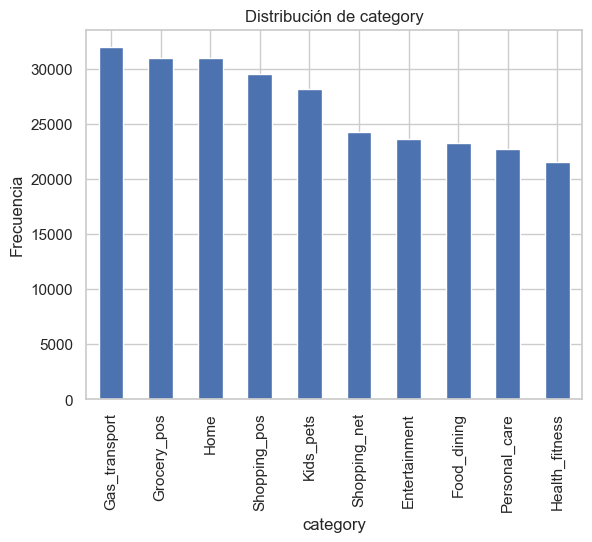

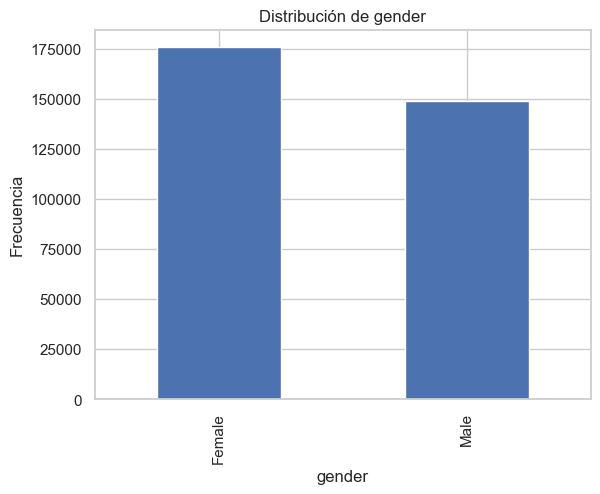

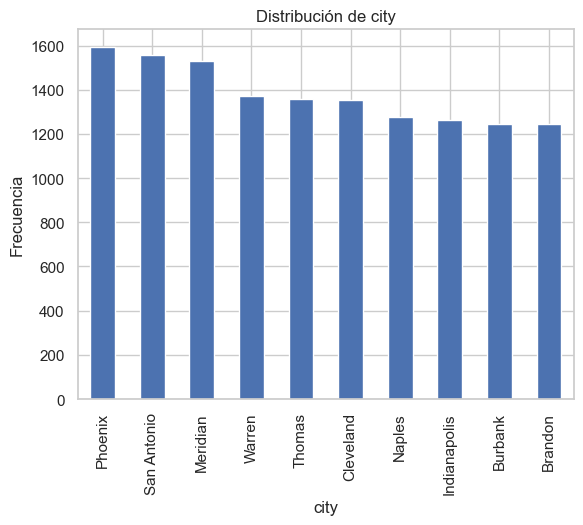

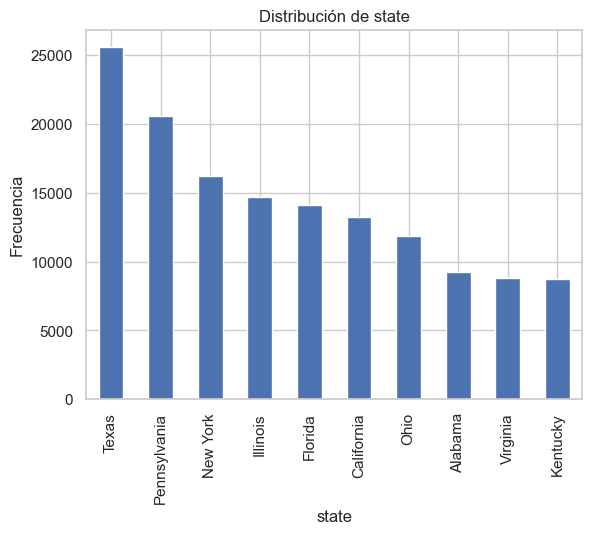

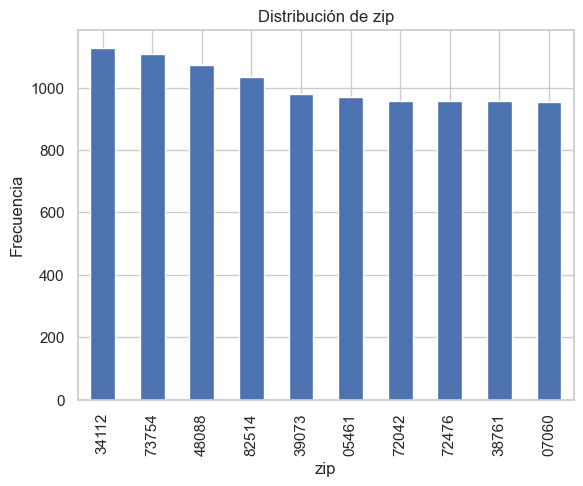

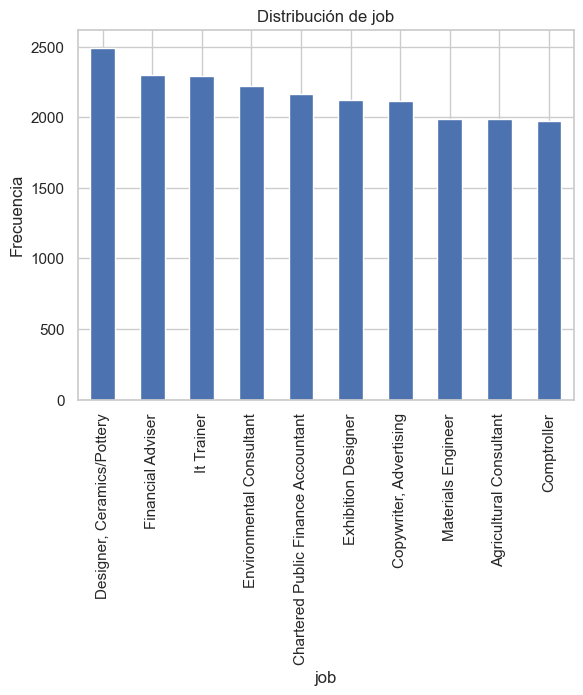

In [14]:
for col in cols_cate_final:

    df_final[col].value_counts().head(10).plot(kind='bar')

    plt.title(f'Distribución de {col}')

    plt.ylabel('Frecuencia')
    
    plt.show()

**Observaciones:**

`merchant`: El gráfico muestra que la actividad se distribuye entre muchos comercios, sin que ninguno domine claramente. Incluso el merchant con mayor frecuencia concentra una proporción reducida del total, lo que evidencia alta cantidad de valores unicos y una cola larga de comercios con volúmenes similares. Para un análisis más estable, conviene agrupar, evitando segmentaciones excesivamente fragmentadas.

`category`: La distribución es relativamente equilibrada entre las principales categorías, sin una categoría que domine de forma extrema. Esto facilita comparativas por tipo de gasto y segmentaciones operativas, ya que las diferencias observadas responden a variación real del consumo y no a un desbalance severo.

`gender`: Se aprecia un ligero predominio de **Female** con un 54,1% frente a **Male** con un 45,9%, pero con proporciones todavía cercanas. Por tanto, la variable permite segmentación básica sin que una clase quede excesivamente infrarepresentada, lo que es útil para contrastes descriptivos y métricas por perfil.

`city`: La frecuencia por ciudad está bastante repartida, incluso la ciudad más repetida **Phoenix** representa una proporción baja del total y el resto mantiene valores similares. Esto apunta a una alta dispersión geográfica a nivel ciudad, por lo que para análisis comparativos conviene agrupar por estado, para evitar segmentaciones demasiado fragmentadas.

`state`: La distribución está concentrada en un conjunto reducido de estados, mientras que el resto se reparte en frecuencias menores. Esto sugiere que el análisis geográfico a nivel estado puede mostrar patrones claros en los estados más representados, y conviene agrupar los menos frecuentes en un bloque, si se quiere evitar visualizaciones demasiado fragmentadas.

`zip`: Incluso los ZIPs más frecuentes representan una fracción pequeña del total, lo que indica alta dispersión geográfica. Para análisis y gráficos, suele ser más informativo trabajar con agregaciones para evitar una segmentación excesivamente detallada.

`job`: La variable presenta alta variedad, las ocupaciones más comunes apenas concentran un porcentaje reducido cada una, con una cola larga de profesiones con frecuencias similares. Para explotar esta variable conviene aplicar agrupaciones y así mejorar la interpretabilidad y estabilidad de comparativas por perfil profesional.

### Variable objetivo `is_fraud`

Distribución de `is_fraud`

La variable objetivo `is_fraud` indica si una transacción se clasifica como `fraude` = **1** o `no fraude` = **0**. El recuento muestra una clara predominancia de operaciones legítimas frente a un número reducido de casos de fraude, lo que confirma una proporción muy baja de la clase positiva.

Esta distribución evidencia un fuerte desbalance de clases, la tasa de fraude es minoritaria, por lo que un modelo que predijera siempre **no fraude** podría obtener una exactitud aparente alta, pero resultaría poco útil para el objetivo real, que es detectar transacciones fraudulentas.

En resumen, `is_fraud` refleja un escenario habitual en detección de fraude, pocas incidencias frente a un gran volumen de operaciones normales, lo que condiciona el enfoque analítico y obliga a priorizar métricas y técnicas adecuadas para la clase minoritaria en fases posteriores.


## Análisis bivariante de variables numéricas vs `is_fraud`

### Boxplots agrupados por valor de `is_fraud`

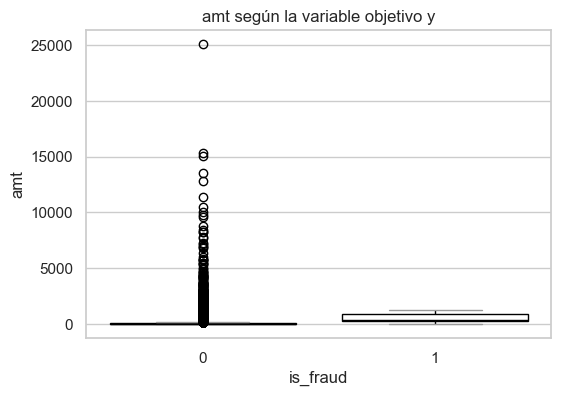

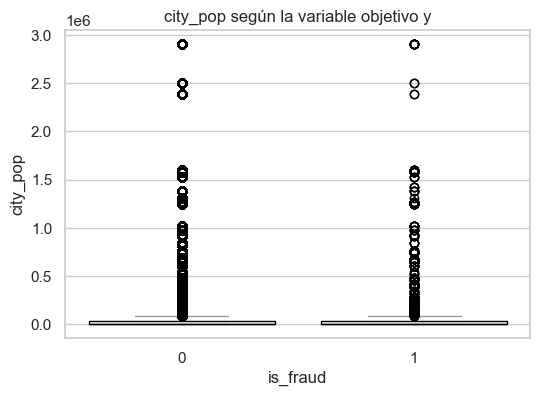

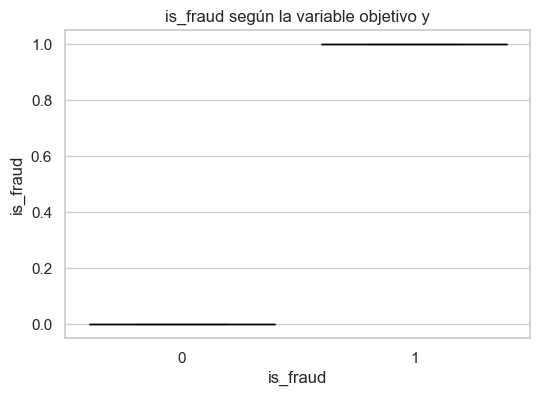

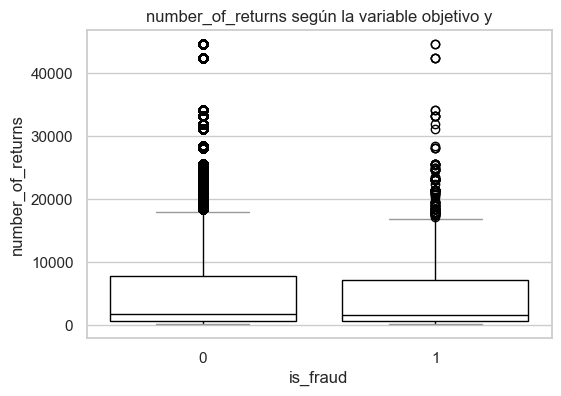

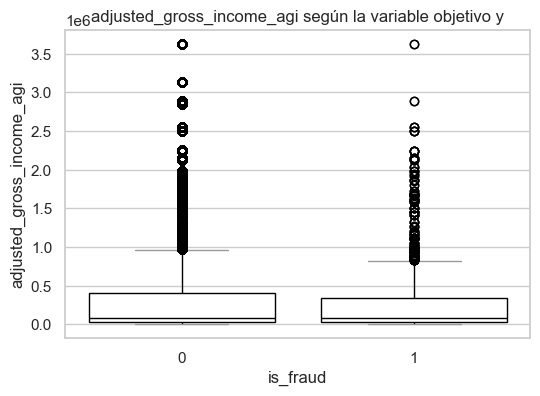

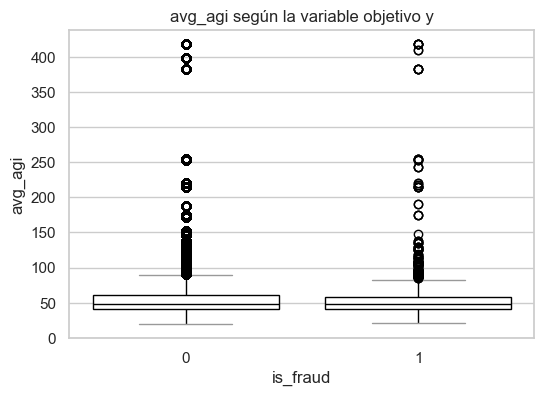

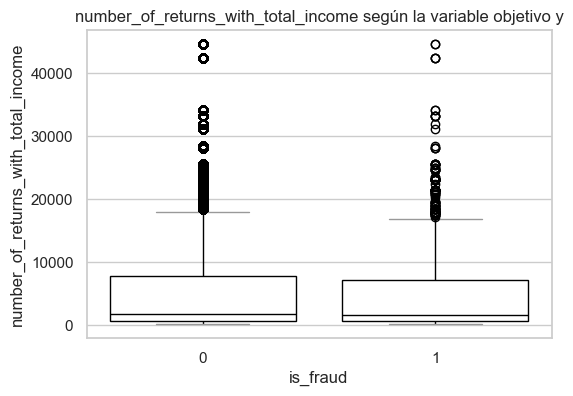

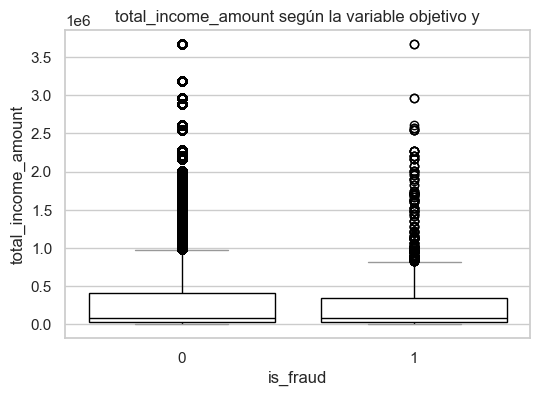

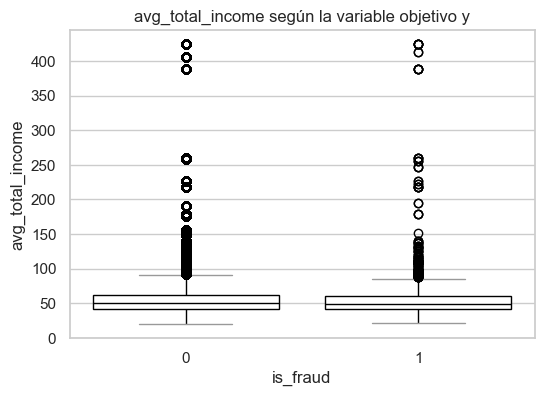

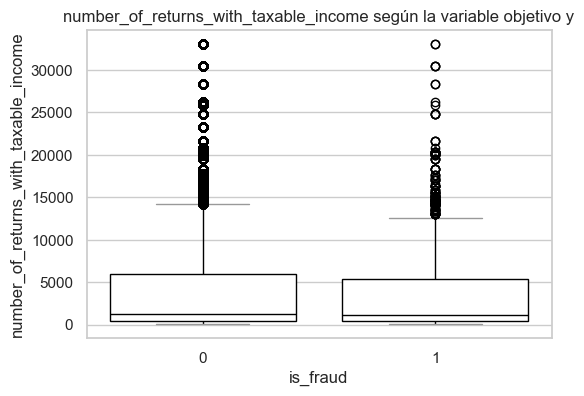

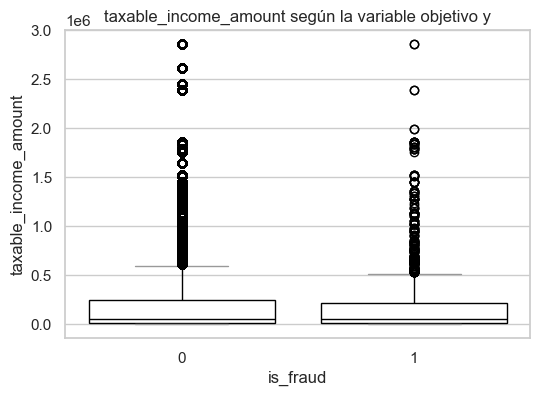

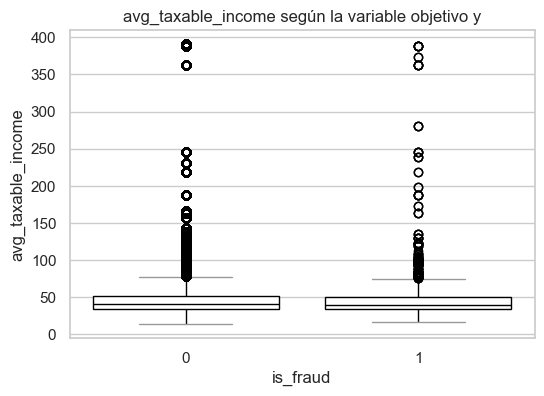

In [15]:
for col in cols_num_final:

    plt.figure(figsize=(6, 4))

    sns.boxplot(
        
        x='is_fraud',

        y=col,

        data=df_final,

        color='white', 

        boxprops={'edgecolor': 'black'},

        whiskerprops={'color': 'black'},

        medianprops={'color': 'black'},

        flierprops={'markeredgecolor': 'black'})
    
    plt.title(f'{col} según la variable objetivo y')
    
    plt.show()

**Observaciones**

In [16]:
df_final.groupby('is_fraud')[cols_num_final].median().T

is_fraud,0,1
amt,46.850000,362.280000
city_pop,4056.000000,4046.000000
is_fraud,0.000000,1.000000
number_of_returns,1680.000000,1510.000000
adjusted_gross_income_agi,82095.000000,76279.000000
avg_agi,48.573913,47.705190
number_of_returns_with_total_income,1680.000000,1510.000000
total_income_amount,82915.000000,77085.000000
avg_total_income,49.586170,48.720495
number_of_returns_with_taxable_income,1270.000000,1110.000000


**Observaciones**

## Análisis bivariante de variables catégoricas vs `is_fraud`

## Tablas de contingencia

In [18]:
for col in cols_cate_final:

    print(f'\nRelación entre {col} e is_fraud')

    tabla = pd.crosstab(df_final[col], df_final['is_fraud'], normalize='index') * 100
    
    display(tabla.round(2))


Relación entre merchant e is_fraud


is_fraud,0,1
merchant,,
fraud_Abbott-Rogahn,99.78,0.22
fraud_Abbott-Steuber,98.67,1.33
fraud_Abernathy and Sons,100.00,0.00
fraud_Abshire PLC,99.37,0.63
"fraud_Adams, Kovacek and Kuhlman",100.00,0.00
...,...,...
fraud_Zemlak Group,98.38,1.62
"fraud_Zemlak, Tillman and Cremin",100.00,0.00
fraud_Ziemann-Waters,99.51,0.49



Relación entre category e is_fraud


is_fraud,0,1
category,,
Entertainment,99.72,0.28
Food_dining,99.81,0.19
Gas_transport,99.57,0.43
Grocery_net,99.73,0.27
Grocery_pos,98.51,1.49
Health_fitness,99.89,0.11
Home,99.80,0.20
Kids_pets,99.78,0.22
Misc_net,98.47,1.53



Relación entre gender e is_fraud


is_fraud,0,1
gender,,
Female,99.44,0.56
Male,99.39,0.61



Relación entre city e is_fraud


is_fraud,0,1
city,,
Acworth,99.37,0.63
Adams,100.00,0.00
Afton,99.69,0.31
Akron,100.00,0.00
Albany,0.00,100.00
...,...,...
Wittenberg,98.61,1.39
Woods Cross,100.00,0.00
Woodville,100.00,0.00



Relación entre state e is_fraud


is_fraud,0,1
state,,
Alabama,99.35,0.65
Alaska,99.33,0.67
Arizona,99.14,0.86
Arkansas,99.26,0.74
California,99.43,0.57
Colorado,99.21,0.79
Connecticut,99.58,0.42
District of Columbia,99.09,0.91
Florida,99.49,0.51



Relación entre zip e is_fraud


is_fraud,0,1
zip,,
01257,100.00,0.00
01330,99.00,1.00
01535,97.66,2.34
01545,100.00,0.00
01612,98.00,2.00
...,...,...
98665,100.00,0.00
99033,99.45,0.55
99113,99.04,0.96



Relación entre job e is_fraud


is_fraud,0,1
job,,
Academic Librarian,99.17,0.83
"Accountant, Chartered",0.00,100.00
"Accountant, Chartered Certified",0.00,100.00
"Accountant, Chartered Public Finance",99.87,0.13
Accounting Technician,99.16,0.84
...,...,...
Water Engineer,100.00,0.00
Water Quality Scientist,99.33,0.67
Web Designer,99.22,0.78


**Observaciones**

## Barras apiladas